In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Entorno del juego
class TicTacToeEnv:
    def __init__(self):
        self.board = np.zeros((3, 3))
        self.done = False

    def reset(self):
        self.board = np.zeros((3, 3))
        self.done = False
        return self.board.flatten()

    def is_winner(self, player):
        for i in range(3):
            if np.all(self.board[i, :] == player) or np.all(self.board[:, i] == player):
                return True
        if self.board[0, 0] == player and self.board[1, 1] == player and self.board[2, 2] == player:
            return True
        if self.board[0, 2] == player and self.board[1, 1] == player and self.board[2, 0] == player:
            return True
        return False

    def is_draw(self):
        return np.all(self.board != 0)

    def step(self, action, player):
        if self.board[action // 3, action % 3] == 0:
            self.board[action // 3, action % 3] = player
            if self.is_winner(player):
                self.done = True
                return self.board.flatten(), 1, self.done  # Win
            elif self.is_draw():
                self.done = True
                return self.board.flatten(), 0, self.done  # Draw
            else:
                return self.board.flatten(), 0, self.done  # Continue
        else:
            return self.board.flatten(), -1, self.done  # Invalid move

# Agente con Q-learning
class QLearningAgent:
    def __init__(self, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.q_table = {}
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon

    def get_q(self, state, action):
        return self.q_table.get((state, action), 0.0)

    def choose_action(self, state):
        if np.random.random() < self.epsilon:
            return np.random.choice([i for i in range(9) if state[i] == 0])
        else:
            qs = [self.get_q(tuple(state), a) for a in range(9)]
            return np.argmax(qs)

    def learn(self, state, action, reward, next_state):
        old_q = self.get_q(tuple(state), action)
        next_q = max([self.get_q(tuple(next_state), a) for a in range(9)])
        self.q_table[(tuple(state), action)] = old_q + self.alpha * (reward + self.gamma * next_q - old_q)

# Entrenamiento
env = TicTacToeEnv()
agent = QLearningAgent()

for episode in range(1000):
    state = env.reset()
    done = False

    while not done:
        action = agent.choose_action(state)
        next_state, reward, done = env.step(action, 1)
        agent.learn(state, action, reward, next_state)
        state = next_state

        if not done:
            opponent_action = random.choice([i for i in range(9) if state[i] == 0])
            next_state, _, done = env.step(opponent_action, -1)

Evaluation over 1000 episodes:
Wins: 362
Losses: 627
Draws: 11
Win Rate: 0.36
Loss Rate: 0.63
Draw Rate: 0.01


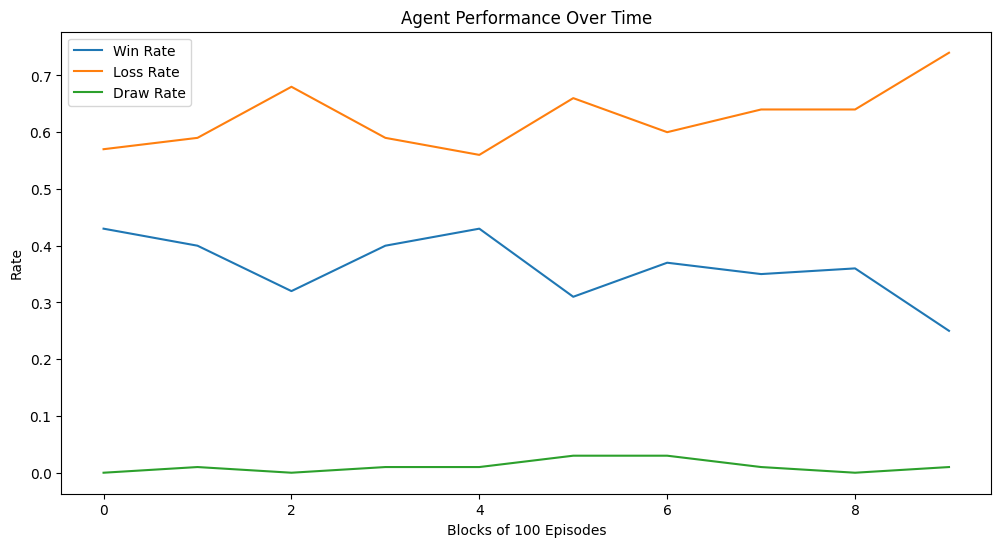

In [7]:
# Evaluación y Graficación
def evaluate_and_plot(agent, episodes=1000, block_size=10):
    win_rates = []
    loss_rates = []
    draw_rates = []

    total_wins = 0
    total_losses = 0
    total_draws = 0

    block_wins = 0
    block_losses = 0
    block_draws = 0

    for episode in range(1, episodes + 1):
        state = env.reset()
        done = False

        while not done:
            # El agente juega primero
            action = agent.choose_action(state)
            next_state, reward, done = env.step(action, 1)
            if done:
                if reward == 1:
                    block_wins += 1
                elif reward == 0:
                    block_draws += 1
                break

            # El oponente aleatorio juega
            opponent_action = random.choice([i for i in range(9) if next_state[i] == 0])
            next_state, reward, done = env.step(opponent_action, -1)
            if done:
                if reward == 1:
                    block_losses += 1
                elif reward == 0:
                    block_draws += 1
                break

            state = next_state

        # Guardar tasas de victoria, derrota y empate en bloques de episodios
        if episode % block_size == 0:
            win_rates.append(block_wins / block_size)
            loss_rates.append(block_losses / block_size)
            draw_rates.append(block_draws / block_size)

            total_wins += block_wins
            total_losses += block_losses
            total_draws += block_draws

            block_wins = 0
            block_losses = 0
            block_draws = 0

    # Imprimir resultados finales
    print(f"Evaluation over {episodes} episodes:")
    print(f"Wins: {total_wins}")
    print(f"Losses: {total_losses}")
    print(f"Draws: {total_draws}")
    print(f"Win Rate: {total_wins / episodes:.2f}")
    print(f"Loss Rate: {total_losses / episodes:.2f}")
    print(f"Draw Rate: {total_draws / episodes:.2f}")

    # Graficar las tasas de desempeño
    plt.figure(figsize=(12, 6))
    plt.plot(win_rates, label="Win Rate")
    plt.plot(loss_rates, label="Loss Rate")
    plt.plot(draw_rates, label="Draw Rate")
    plt.xlabel("Blocks of {} Episodes".format(block_size))
    plt.ylabel("Rate")
    plt.title("Agent Performance Over Time")
    plt.legend()
    plt.show()

# Evaluar el agente y graficar
evaluate_and_plot(agent, episodes=1000, block_size=100)
